In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("students_scored.csv")
df.head()


,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,...,distractions,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI,Risk_Category
0,S0001,24,BCA,1,5.48,75,82,6,6,6,...,5,6,7,56,66.30,52.0,70.0,65.0,63.140,Yellow
1,S0002,21,MBA,1,6.23,95,55,8,6,1,...,4,8,2,72,70.65,29.0,35.0,50.0,47.945,Red
2,S0003,22,BCA,8,8.49,99,90,7,4,4,...,7,6,6,88,90.15,36.0,20.0,60.0,55.045,Yellow
3,S0004,24,B.Sc,8,7.85,64,88,5,8,7,...,5,3,5,61,76.05,65.0,45.0,40.0,58.065,Yellow
4,S0005,20,B.Tech,2,5.49,83,53,10,6,1,...,7,6,10,62,62.95,21.0,50.0,80.0,54.135,Yellow


In [3]:
features = ["APS", "WWS", "PTMS", "CRS", "SRI"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df["Cluster"].value_counts()


Cluster
0    147
1    124
2    124
3    105
Name: count, dtype: int64

In [5]:
df.to_csv("students_clustered.csv", index=False)


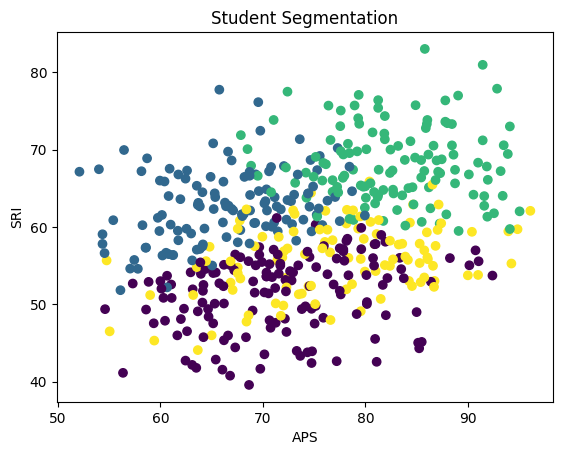

In [6]:
plt.scatter(df["APS"], df["SRI"], c=df["Cluster"])
plt.xlabel("APS")
plt.ylabel("SRI")
plt.title("Student Segmentation")
plt.show()
